<a href="https://colab.research.google.com/github/Preetika764/ML_Recruitment/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
!pip install numpy mnist matplotlib sklearn
import numpy as np
from matplotlib import pyplot as plt
import mnist
import matplotlib
import os
import matplotlib.gridspec as gridspec


In [89]:
X_train = mnist.train_images()
y_train = mnist.train_labels()
X_test = mnist.test_images()
y_test = mnist.test_labels()

X_train = X_train/255
X_test = X_test/255

X_train = X_train.reshape((-1,784))
X_test = X_test.reshape((-1,784))
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1, 1))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#print(X_train.ndim)

(60000, 784)
(10000, 784)
(60000, 1)
(10000, 1)


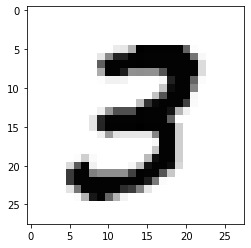

In [90]:
x = X_train[7].reshape(28,28)
plt.imshow(x, cmap='Greys')

In [91]:
def activation(z, derivative=False):
    """
    Sigmoid activation function:
    It handles two modes: normal and derivative mode.
    Applies a pointwise operation on vectors

    Parameters:
    ---
    z: pre-activation vector at layer l
        shape (n[l], batch_size)
    Returns:
    pontwize activation on each element of the input z
    """
    if derivative:
        n_sigmoid = np.zeros(z.shape)
        n_sigmoid = 1 / (1 + np.exp(-z))
        d_sigmoid = np.zeros(z.shape)
        d_sigmoid = n_sigmoid(z) + (1 - n_sigmoid(z))
        return d_sigmoid
        # return the derivative of the sigmoid activation function
    else:
        n_sigmoid = np.zeros(z.shape)
        n_sigmoid = 1 / (1 + np.exp(-z))
        return n_sigmoid
        # return the normal sigmoid activation function


In [92]:
def cost_function(y_true, y_pred):
    """
    Computes the Mean Square Error between a ground truth vector and a prediction vector
    Parameters:
    ---
    y_true: ground-truth vector
    y_pred: prediction vector
    Returns:
    ---
    cost: a scalar value representing the loss
    """
    n = y_pred.shape[1]
    cost = (1./(2*n)) * np.sum((y_true - y_pred) ** 2)
    return cost

def cost_function_prime(y_true, y_pred):
    """
    Computes the derivative of the loss function w.r.t the activation of the output layer
    Parameters:
    ---
    y_true: ground-truth vector
    y_pred: prediction vector
    Returns:
    ---
    cost_prime: derivative of the loss w.r.t. the activation of the output
    shape: (n[L], batch_size)
    """

    # Calculate the derivative of the cost function

    #derivative of cost_function 
    cost_prime = (y_pred - y_true)
    return cost_prime

    
def log(x):
    return 1 / ( 1+ np.exp(-1*x))
def d_log(x):
    return log(x) * (1 - log(x))

def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig

epochs = 10
#epoch refers to one cycle through the full training dataset
lr = 0.0001


#Initializing the weights and biases for generator and discriminator

Discriminator_W1 = np.random.normal(size=(784,128),scale=(1. / np.sqrt(784 / 2.)))   *0.002
Discriminator_b1 = np.zeros(128)

Discriminator_W2 = np.random.normal(size=(128,1),scale=(1. / np.sqrt(128 / 2.)))     *0.002
Discriminator_b2 = np.zeros(1)


Generator_W1 = np.random.normal(size=(100,128),scale=(1. / np.sqrt(100 / 2.)))   *0.002
Generator_b1 = np.zeros(128)

Generator_W2 = np.random.normal(size=(128,784),scale=(1. / np.sqrt(128 / 2.)))   *0.002
Generator_b2 = np.zeros(784)




beta_1,beta_2,epsilon = 0.9,0.999,0.00000001






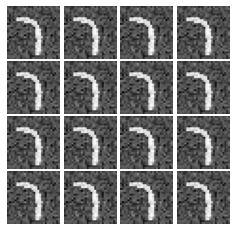

In [93]:
for iter in range(epochs):

    num = np.random.randint(59999)
    current_image = np.expand_dims(X_train[num],axis=0)

    #Generating the fake data

    Z = np.random.uniform(0, 1., size=[1, 100])
    Generator_l1 = Z.dot(Generator_W1) + Generator_b1
    Generator_l1A = log(Generator_l1)
    Generator_l2 = Generator_l1A.dot(Generator_W2) + Generator_b2
    
    cfd = log(Generator_l2)

    #Forward propagation for real data

    Discriminator_l1_r = current_image.dot(Discriminator_W1) + Discriminator_b1
    Discriminator_l1_rA = log(Discriminator_l1_r)
    Discriminator_l2_r = Discriminator_l1_rA.dot(Discriminator_W2) + Discriminator_b2
    Discriminator_l2_rA = log(Discriminator_l2_r)

    #Forward propagation for fake data
    Discriminator_l1_f = cfd.dot(Discriminator_W1) + Discriminator_b1
    Discriminator_l1_fA = log(Discriminator_l1_f)
    Discriminator_l2_f = Discriminator_l1_fA.dot(Discriminator_W2) + Discriminator_b2
    Discriminator_l2_fA = log(Discriminator_l2_f)

    #Now we calculate the cost for the discriminator

    Discriminator_cost = -np.log(Discriminator_l2_rA) + np.log(1.0- Discriminator_l2_fA)


    #Back propagation for discriminator

    grad_f_w2 =  (Discriminator_l1_fA).T.dot((1/(1.0- Discriminator_l2_fA)) * (d_log(Discriminator_l2_f))) 
    grad_f_b2 = (1/(1.0- Discriminator_l2_fA)) * (d_log(Discriminator_l2_f))

    grad_f_w1 = cfd.T.dot((((1/(1.0- Discriminator_l2_fA))* (d_log(Discriminator_l2_f))).dot(Discriminator_W2.T)) * (d_log(Discriminator_l1_f))) 
    grad_f_b1 = (((1/(1.0- Discriminator_l2_fA))* (d_log(Discriminator_l2_f))).dot(Discriminator_W2.T)) * (d_log(Discriminator_l1_f))

 
    grad_r_w2 = (Discriminator_l1_rA).T.dot((- 1/Discriminator_l2_rA) * (d_log(Discriminator_l2_r))) 
    grad_r_b2 = (- 1/Discriminator_l2_rA)* (d_log(Discriminator_l2_r))

    grad_r_w1 =       current_image.T.dot((((- 1/Discriminator_l2_rA) * (d_log(Discriminator_l2_r))).dot(Discriminator_W2.T)) * (d_log(Discriminator_l1_r))) 
    grad_r_b1 =       (((- 1/Discriminator_l2_rA) * (d_log(Discriminator_l2_r))).dot(Discriminator_W2.T))* (d_log(Discriminator_l1_r))

    grad_w1 =grad_f_w1 + grad_r_w1
    grad_b1 =grad_f_b1 + grad_r_b1
    
    grad_w2 =grad_f_w2 + grad_r_w2
    grad_b2 =grad_f_b2 + grad_r_b2

    # ---- Update Gradient ----

    v1,m1 = 0,0
    v2,m2 = 0,0
    v3,m3 = 0,0
    v4,m4 = 0,0
    m1 = beta_1 * m1 + (1 - beta_1) * grad_w1
    v1 = beta_2 * v1 + (1 - beta_2) * grad_w1 ** 2

    m2 = beta_1 * m2 + (1 - beta_1) * grad_b1
    v2 = beta_2 * v2 + (1 - beta_2) * grad_b1 ** 2

    m3 = beta_1 * m3 + (1 - beta_1) * grad_w2
    v3 = beta_2 * v3 + (1 - beta_2) * grad_w2 ** 2

    m4 = beta_1 * m4 + (1 - beta_1) * grad_b2
    v4 = beta_2 * v4 + (1 - beta_2) * grad_b2 ** 2

    Discriminator_W1 = Discriminator_W1 - (lr / (np.sqrt(v1 /(1-beta_2) ) + eps)) * (m1/(1-beta_1))
    Discriminator_b1 = Discriminator_b1 - (lr / (np.sqrt(v2 /(1-beta_2) ) + eps)) * (m2/(1-beta_1))
    
    Discriminator_W2 = Discriminator_W2 - (lr / (np.sqrt(v3 /(1-beta_2) ) + eps)) * (m3/(1-beta_1))
    Discriminator_b2 = Discriminator_b2 - (lr / (np.sqrt(v4 /(1-beta_2) ) + eps)) * (m4/(1-beta_1))


    #Forward propagation for generator

    Z = np.random.uniform(-1., 1., size=[1, 100])
    Generator_l1 = Z.dot(Generator_W1) + Generator_b1
    Generator_l1A = log(Generator_l1)
    Generator_l2 = Generator_l1A.dot(Generator_W2) + Generator_b2
  
    cfd = log(Generator_l2)

    Discriminator_l1 = cfd.dot(Discriminator_W1) + Discriminator_b1
    Discriminator_l1_A = log(Discriminator_l1)
    Discriminator_l2 = Discriminator_l1_A.dot(Discriminator_W2) + Discriminator_b2
    Discriminator_l2_A = log(Discriminator_l2)

     #Calculation the cost for generator

    Generator_cost = -np.log(Discriminator_l2_A)


    #Back propagation for generator

    g1 = ((-1/Discriminator_l2_A) * d_log(Discriminator_l2).dot(Discriminator_W2.T) * (d_log(Discriminator_l1))).dot(Discriminator_W1.T)
    grad_Generator_w2 = (Generator_l1A).T.dot(g1 * ( d_log(Generator_l2)))
    grad_Generator_b2 = (g1 * ( d_log(Generator_l2)))

    grad_Generator_w1 = Z.T.dot(( (g1 *  d_log(Generator_l2)).dot(Generator_W2.T)) * d_log(Generator_l1))
    grad_Generator_b1 = ( (g1 *  d_log(Generator_l2)).dot(Generator_W2.T))* (d_log(Generator_l1))

    v5,m5 = 0,0
    v6,m6 = 0,0
    v7,m7 = 0,0
    v8,m8 = 0,0
    m5 = beta_1 * m5 + (1 - beta_1) * grad_Generator_w1
    v5 = beta_2 * v5 + (1 - beta_2) * grad_Generator_w1 ** 2

    m6 = beta_1 * m6 + (1 - beta_1) * grad_Generator_b1
    v6 = beta_2 * v6 + (1 - beta_2) * grad_Generator_b1 ** 2

    m7 = beta_1 * m7 + (1 - beta_1) * grad_Generator_w2
    v7 = beta_2 * v7 + (1 - beta_2) * grad_Generator_w2 ** 2

    m8 = beta_1 * m8 + (1 - beta_1) * grad_Generator_b2
    v8 = beta_2 * v8 + (1 - beta_2) * grad_Generator_b2 ** 2

    Generator_W1 = Generator_W1 - (lr/ (np.sqrt(v5 /(1-beta_2) ) + eps)) * (m5/(1-beta_1))
    Generator_b1 = Generator_b1 - (lr / (np.sqrt(v6 /(1-beta_2) ) + eps)) * (m6/(1-beta_1))
    
    Generator_W2 = Generator_W2 - (lr / (np.sqrt(v7 /(1-beta_2) ) + eps)) * (m7/(1-beta_1))
    Generator_b2 = Generator_b2 - (lr / (np.sqrt(v8 /(1-beta_2) ) + eps)) * (m8/(1-beta_1))

    if iter == 0:
          lr = lr * 0.01
    if iter == 40:
          lr= lr * 0.01

 
    if iter%10 == 0:
        
        
          Z = np.random.uniform(0, 1., size=[16, 100]) 

          Generator_l1 = Z.dot(Generator_W1) + Generator_b1
          Generator_l1A = log(Generator_l1)
          Generator_l2 = Generator_l1A.dot(Generator_W2) + Generator_b2
        
          cfd= log(Generator_l2)
        
          fig = plot(cfd)
       




